In [1]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import pandas as pd
import numpy as np
import wget
import os

In [2]:
from datetime import datetime
print('Дата обновления этого ноутбука:')
print(datetime.today())

Дата обновления этого ноутбука:
2020-06-05 13:38:01.580453


# Избыточная смертность в Мск

In [3]:
msk_death = pd.read_excel('data-6267-2020-05-08.xlsx').set_index('ID')

In [4]:
month_list = ['Январь', 'Февраль', 'Март', 'Апрель']

In [5]:
msk_death.head()

,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber,global_id
ID,,,,,,,,,,,,,
1,2010,Январь,9206,4785,4421,10430,4997,3302,1241,95,491,29762,37591658
2,2010,Февраль,9060,4656,4404,9573,4873,2937,1326,97,639,28505,37591659
3,2010,Март,10934,5630,5304,10528,3642,4361,1644,147,717,31973,37591660
4,2010,Апрель,10140,5278,4862,9501,9698,3943,1530,128,642,35572,37591661
5,2010,Май,9457,4825,4632,9482,3726,3554,1397,96,492,28204,37591662


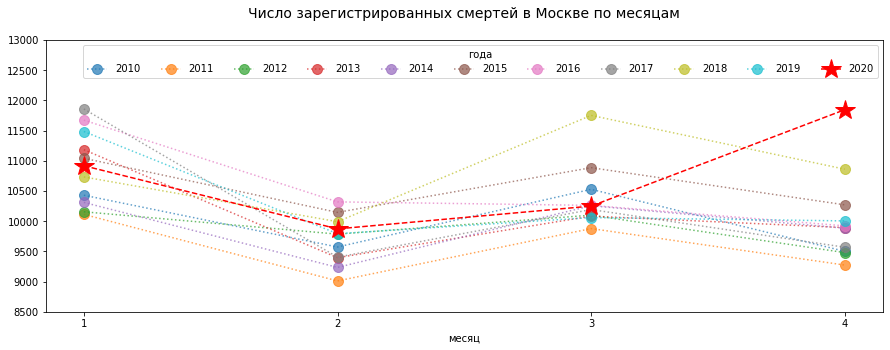

In [6]:
plt.figure(figsize=(15,5))
for year in range(2010, 2020):
    q = (msk_death['Year']==year)&(msk_death['Month'].isin(month_list))
    plt.plot(range(1, 5), msk_death[q]['StateRegistrationOfDeath'].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

q = (msk_death['Year']==2020)&(msk_death['Month'].isin(month_list))
plt.plot(range(1, 5), msk_death[q]['StateRegistrationOfDeath'].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')
plt.legend(ncol=11, title='года')
plt.xticks(range(1,5))
plt.xlabel('месяц')
plt.ylim(8500, 13000)
plt.title('Число зарегистрированных смертей в Москве по месяцам\n', fontsize=14)
plt.show()

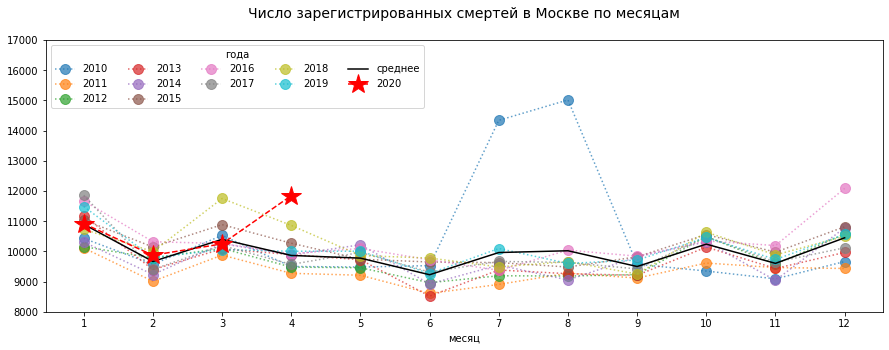

In [7]:
col = 'StateRegistrationOfDeath'
plt.figure(figsize=(15,5))
for year in range(2010, 2020):
    q = (msk_death['Year']==year)
    plt.plot(range(1, 13), msk_death[q][col].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

plt.plot(range(1, 13), 
         msk_death[~msk_death['Year'].isin([2020])].groupby('Month')[col].mean().reindex(msk_death['Month'].unique()), 
         label='среднее', color='black')
    
q = (msk_death['Year']==2020)
plt.plot(range(1, 5), msk_death[q][col].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')

plt.legend(ncol=5, title='года')
plt.xticks(range(1,13))
plt.xlabel('месяц')
plt.ylim(8000, 17000)
plt.title('Число зарегистрированных смертей в Москве по месяцам\n', fontsize=14)
plt.show()

**Отклонение в смертности за апрель от среднего в этом месяце за предыдущие года**

In [8]:
mean_prev = msk_death[(~msk_death['Year'].isin([2020])&(msk_death['Month'].isin(['Апрель'])))][col].mean().round()

In [9]:
mean_2020 = msk_death[(msk_death['Year'].isin([2020])&(msk_death['Month'].isin(['Апрель'])))][col].mean().round()

In [10]:
mean_2020 - mean_prev

1980.0

In [11]:
mean_2020 / mean_prev

1.200689235759173

**Разница между сезоном гриппа и остальными месяцами**

In [12]:
flu_time = ['Декабрь', 'Январь', 'Февраль', 'Март']

death_in_flu_time = msk_death[(~msk_death['Year'].isin([2010, 2020])
                               &(msk_death['Month'].isin(flu_time)))][col].mean().round()
death_in_not_flu_time = msk_death[(~msk_death['Year'].isin([2010, 2020])
                                   &(~msk_death['Month'].isin(flu_time)))][col].mean().round()

In [13]:
death_in_flu_time / death_in_not_flu_time

1.0744724865535789

In [14]:
death_in_flu_time - death_in_not_flu_time

720.0

# Избыточная смертность в Санкт-Петербурге

In [15]:
spb_death = pd.read_excel('spb_all_death.xlsx').set_index('ID')

In [16]:
spb_death.head(2)

,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber,global_id
ID,,,,,,,,,,,,,
13,2011,Январь,NaN,NaN,NaN,5394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2011,Февраль,NaN,NaN,NaN,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN


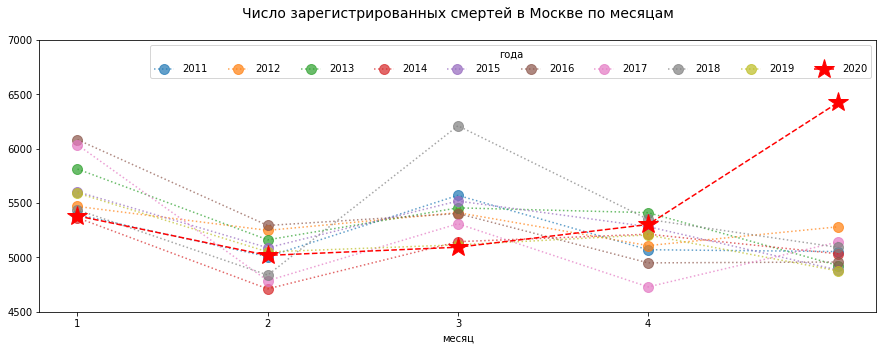

In [17]:
plt.figure(figsize=(15,5))
for year in range(2011, 2020):
    q = (spb_death['Year']==year)&(spb_death['Month'].isin(month_list+['Май']))
    plt.plot(range(1, 6), spb_death[q]['StateRegistrationOfDeath'].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

q = (spb_death['Year']==2020)&(spb_death['Month'].isin(month_list+['Май']))
plt.plot(range(1, 6), spb_death[q]['StateRegistrationOfDeath'].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')
plt.legend(ncol=11, title='года')
plt.xticks(range(1,5))
plt.xlabel('месяц')
plt.ylim(4500, 7000)
plt.title('Число зарегистрированных смертей в Москве по месяцам\n', fontsize=14)
plt.show()

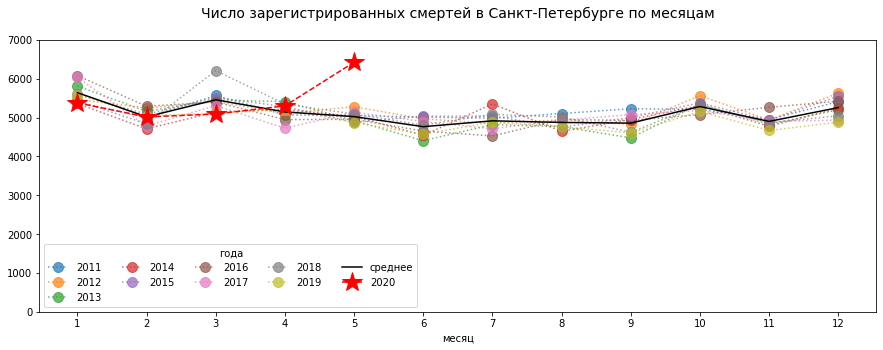

In [18]:
col = 'StateRegistrationOfDeath'
plt.figure(figsize=(15,5))
for year in range(2011, 2020):
    q = (spb_death['Year']==year)
    plt.plot(range(1, 13), spb_death[q][col].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

plt.plot(range(1, 13), 
         spb_death[~spb_death['Year'].isin([2020])].groupby('Month')[col].mean().reindex(spb_death['Month'].unique()), 
         label='среднее', color='black')
    
q = (spb_death['Year']==2020)
plt.plot(range(1, 6), spb_death[q][col].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')

plt.legend(ncol=5, title='года')
plt.xticks(range(1,13))
plt.xlabel('месяц')
plt.ylim(0, 7000)
plt.title('Число зарегистрированных смертей в Санкт-Петербурге по месяцам\n', fontsize=14)
plt.show()

**Отклонение в смертности за май от среднего в этом месяце за предыдущие года**

In [19]:
mean_prev = spb_death[(~spb_death['Year'].isin([2020])&(spb_death['Month'].isin(['Май'])))][col].mean().round()

In [20]:
mean_2020 = spb_death[(spb_death['Year'].isin([2020])&(spb_death['Month'].isin(['Май'])))][col].mean().round()

In [21]:
mean_2020

6427.0

In [22]:
mean_2020 - mean_prev

1400.0

In [23]:
mean_2020/mean_prev

1.2784961209468868

**...аналогично для марта 2018**

In [24]:
spb_death[(spb_death['Year'].isin([2018])&(spb_death['Month'].isin(['Март'])))][col].mean().round() / spb_death[(~spb_death['Year'].isin([2018, 2020])&(spb_death['Month'].isin(['Март'])))][col].mean().round()

1.1572573132103596

In [25]:
spb_death[(spb_death['Year'].isin([2018])&(spb_death['Month'].isin(['Март'])))][col].mean().round() - spb_death[(~spb_death['Year'].isin([2018, 2020])&(spb_death['Month'].isin(['Март'])))][col].mean().round()

844.0

**Разница между сезоном гриппа и остальными месяцами**

In [26]:
flu_time = ['Декабрь', 'Январь', 'Февраль', 'Март']

death_in_flu_time = spb_death[(~spb_death['Year'].isin([2020])&(spb_death['Month'].isin(flu_time)))][col].mean().round()
death_in_not_flu_time = spb_death[(~spb_death['Year'].isin([2020])&(~spb_death['Month'].isin(flu_time)))][col].mean().round()

In [27]:
death_in_flu_time / death_in_not_flu_time

1.0750050271465916

In [28]:
death_in_flu_time - death_in_not_flu_time

373.0